In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

iris = sns.load_dataset("iris") 
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [2]:
iris.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [3]:
iris.shape

(150, 5)

In [4]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
iris[iris.duplicated()]

,sepal_length,sepal_width,petal_length,petal_width,species
142,5.8,2.7,5.1,1.9,virginica


In [6]:
iris.groupby('species').agg(['mean', 'median'])

sepal_length        sepal_width        petal_length         \
                   mean median        mean median         mean median   
species                                                                 
setosa            5.006    5.0       3.428    3.4        1.462   1.50   
versicolor        5.936    5.9       2.770    2.8        4.260   4.35   
virginica         6.588    6.5       2.974    3.0        5.552   5.55   

           petal_width         
                  mean median  
species                        
setosa           0.246    0.2  
versicolor       1.326    1.3  
virginica        2.026    2.0

In [7]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


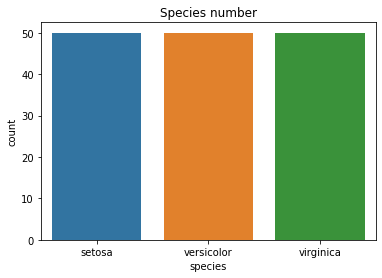

In [8]:
plt.title('Species number')
sns.countplot(iris['species'])

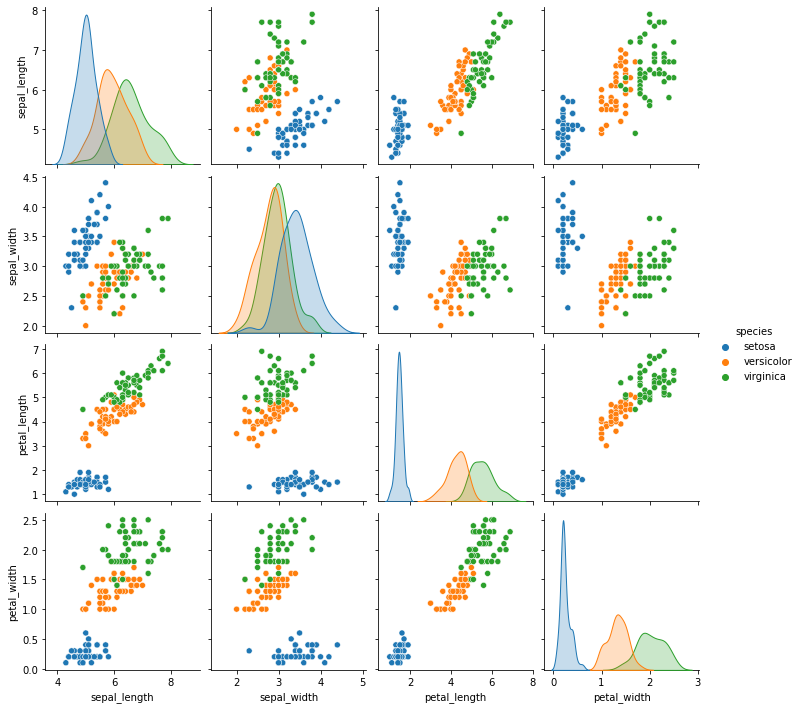

In [9]:
pp = sns.pairplot(iris, hue = 'species')
pp

[]

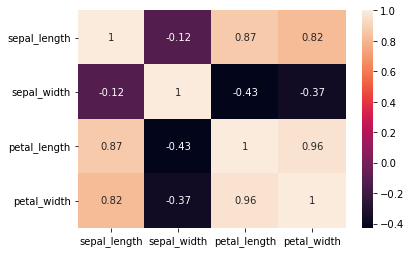

In [10]:
plt.figure(1)
sns.heatmap(iris.corr(), annot = True)
plt.plot()

In [11]:
from sklearn.model_selection import train_test_split
x = iris.drop('species', axis = 1)
y = iris['species']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 90)
x_test

,sepal_length,sepal_width,petal_length,petal_width
90,5.5,2.6,4.4,1.2
16,5.4,3.9,1.3,0.4
15,5.7,4.4,1.5,0.4
111,6.4,2.7,5.3,1.9
136,6.3,3.4,5.6,2.4
44,5.1,3.8,1.9,0.4
85,6.0,3.4,4.5,1.6
116,6.5,3.0,5.5,1.8
49,5.0,3.3,1.4,0.2
124,6.7,3.3,5.7,2.1


In [12]:
iris_std = StandardScaler()
iris_std.fit(x_train)
x_train_std = iris_std.transform(x_train)
x_test_std = iris_std.transform(x_test)

print(x_train)
print(x_train_std)

     sepal_length  sepal_width  petal_length  petal_width
89            5.5          2.5           4.0          1.3
78            6.0          2.9           4.5          1.5
99            5.7          2.8           4.1          1.3
134           6.1          2.6           5.6          1.4
39            5.1          3.4           1.5          0.2
..            ...          ...           ...          ...
37            4.9          3.6           1.4          0.1
58            6.6          2.9           4.6          1.3
67            5.8          2.7           4.1          1.0
114           5.8          2.8           5.1          2.4
91            6.1          3.0           4.6          1.4

[105 rows x 4 columns]
[[-0.38490528 -1.25782697  0.17685121  0.16860066]
 [ 0.23495752 -0.29904779  0.47254192  0.43887653]
 [-0.13696016 -0.53874258  0.23598935  0.16860066]
 [ 0.35893007 -1.01813217  1.12306148  0.30373859]
 [-0.88079551  0.89942618 -1.30160234 -1.31791661]
 [ 1.59865566 -0.059353  

from sklearn.neighbors import KNeighborsClassifier 
neighbor = KNeighborsClassifier(n_neighbors = 4)
neighbor.fit(x_train, y_train)

In [15]:
y_prediction = neighbor.predict(x_test)
pd.concat([x_test, y_test, pd.Series(y_prediction, name = 'prediction', index = x_test.index)], ignore_index = False, axis =1)

NameError: name 'neighbor' is not defined

In [64]:
from sklearn.metrics import confusion_matrix, classification_report 
print (confusion_matrix(y_test, y_prediction))

[[16  0  0]
 [ 0  9  0]
 [ 0  2 18]]


In [57]:
print (classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       0.82      1.00      0.90         9
   virginica       1.00      0.90      0.95        20

    accuracy                           0.96        45
   macro avg       0.94      0.97      0.95        45
weighted avg       0.96      0.96      0.96        45



In [67]:
error_rate =[]
for i in range(1,20):
    neighbor = KNeighborsClassifier(n_neighbors = i)
    neighbor.fit(x_train, y_train)
    prediction_i = neighbor.predict(x_test)
    error_rate.append(np.mean(y_test != prediction_i))
error_rate

[0.044444444444444446,
 0.06666666666666667,
 0.022222222222222223,
 0.022222222222222223,
 0.022222222222222223,
 0.044444444444444446,
 0.044444444444444446,
 0.06666666666666667,
 0.022222222222222223,
 0.044444444444444446,
 0.044444444444444446,
 0.06666666666666667,
 0.044444444444444446,
 0.044444444444444446,
 0.044444444444444446,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.044444444444444446]

Text(0, 0.5, 'error_rate')

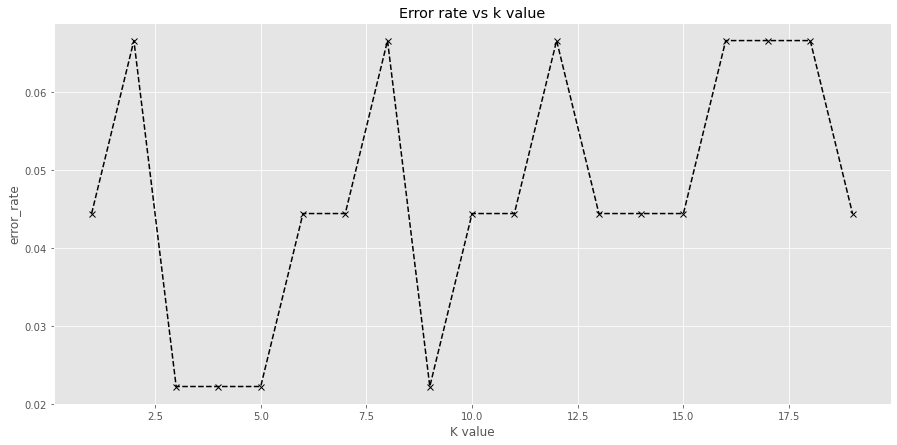

In [68]:
plt.style.use('ggplot')
plt.subplots(figsize = (15,7))
plt.plot(range(1,20), error_rate, linestyle = 'dashed', color = 'black', marker = 'x', markerfacecolor = 'red')
plt.title('Error rate vs k value')
plt.xlabel('K value')
plt.ylabel('error_rate')